In [97]:
import warnings
warnings.filterwarnings('ignore')

In [98]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# IMPORT LIBRARIES

In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [100]:
e=r"C:\Users\KURIAN\Desktop\DATA SCIENCE\Project 1\Emily.csv"
df=pd.read_csv(e)
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [101]:
df.describe() # to see detailed information about the data set

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


 # EDA

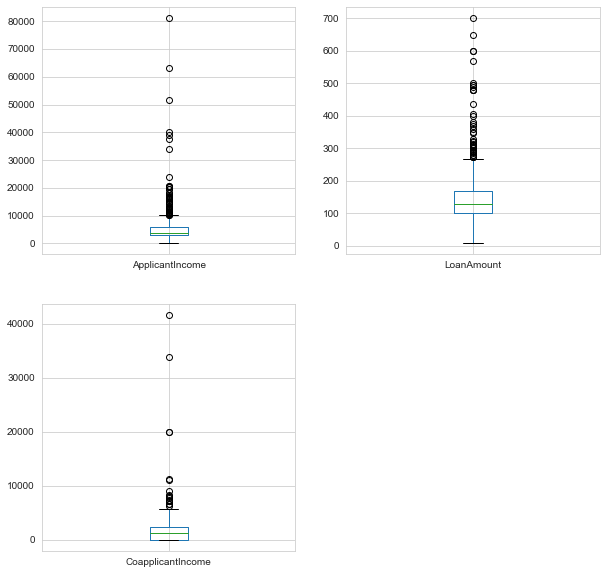

In [102]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
df.boxplot(column="ApplicantIncome") #plotting box plot  
plt.subplot(2,2,2)
df.boxplot(column='LoanAmount') #plotting boxplot 
plt.subplot(2,2,3)
df.boxplot(column='CoapplicantIncome') #plotting boxplot 

# from the box plot it is visible that the datas are positive skewed so we need to do normalization. 
# OR from the detailed information table it is visble that Mean>Median which is called positive skew

In [103]:
df.isnull().sum() #checking whether any null values are there in the data set

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# checking total count of each class

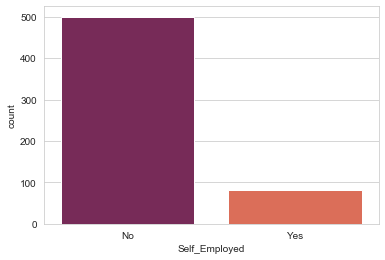

In [104]:
sns.set_style("whitegrid")
sns.countplot(x="Self_Employed",data=df,palette="rocket")

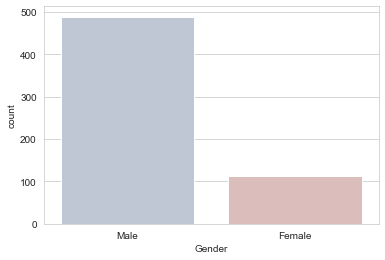

In [105]:
sns.set_style("whitegrid")
sns.countplot(x="Gender",data=df,palette="vlag")

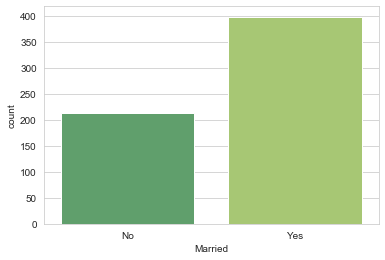

In [106]:
sns.set_style("whitegrid")
sns.countplot(x="Married",data=df,palette="summer")

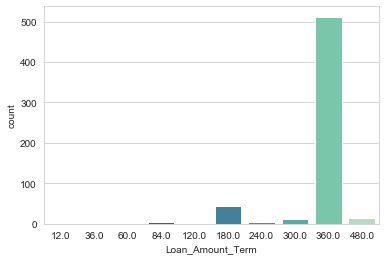

In [107]:
sns.set_style("whitegrid")
sns.countplot(x="Loan_Amount_Term",data=df,palette="mako")

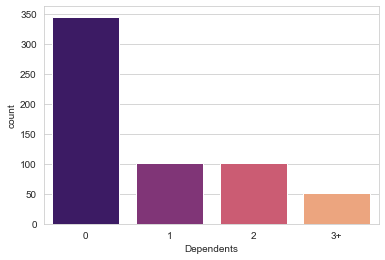

In [108]:
sns.set_style("whitegrid")
sns.countplot(x="Dependents",data=df,palette="magma")

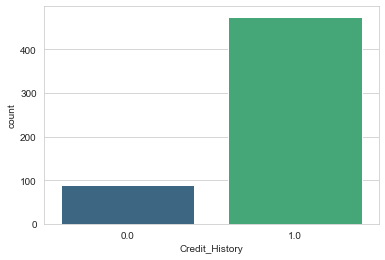

In [109]:
sns.set_style("whitegrid")
sns.countplot(x="Credit_History",data=df,palette="viridis")

# DATA PRE-PROCESSING

In [110]:
df['Self_Employed'].fillna("No", inplace=True) # filling NA with "No" bcz "No" has the highest count(500) so it wont affect the result much
df["Gender"].fillna("Male",inplace=True) 
df["Loan_Amount_Term"].fillna(360,inplace=True)
df["Married"].fillna("Yes",inplace=True)
df['Dependents'].fillna("0",inplace=True)
df['Credit_History'].fillna(1,inplace=True)
df["LoanAmount"].fillna(df['LoanAmount'].mean(), inplace=True) # filling the empty values with mean

# Above we replaced all the NA with the highestest count class so that it won't affect the result much

In [111]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Normalisation


Text(0.5, 1.0, 'After')

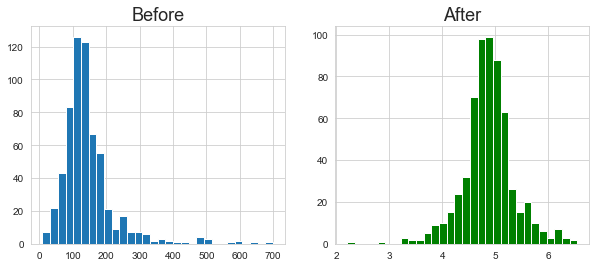

In [112]:
plt.figure(figsize=(10,4))
df["LoanAmount_log"]=np.log(df["LoanAmount"])
plt.subplot(1,2,1)
df['LoanAmount'].hist(bins=30)
plt.title("Before",fontsize=18)
plt.subplot(1,2,2)
df['LoanAmount_log'].hist(bins=30,color="green")
plt.title("After",fontsize=18)


Text(0.5, 1.0, 'After')

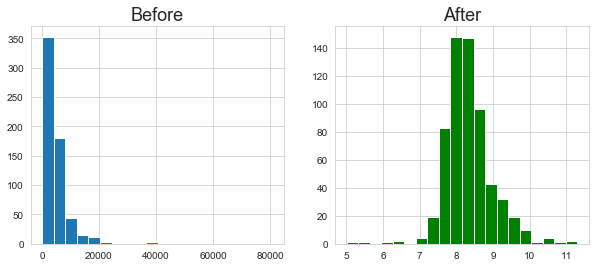

In [113]:
plt.figure(figsize=(10,4))
df['ApplicantIncome_log']=np.log(df["ApplicantIncome"])
plt.subplot(1,2,1)
df['ApplicantIncome'].hist(bins=20)
plt.title("Before",fontsize=18)
plt.subplot(1,2,2)
df['ApplicantIncome_log'].hist(bins=20,color="green")
plt.title("After",fontsize=18)

In [114]:
df['CoapplicantIncome_log']=np.log(df["CoapplicantIncome"])

# Label Encoder

In [115]:
df[['Gender',"Dependents",'Married','Education',"Self_Employed","Property_Area","Loan_Status"]].head(3) 

,Gender,Dependents,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,0,No,Graduate,No,Urban,Y
1,Male,1,Yes,Graduate,No,Rural,N
2,Male,0,Yes,Graduate,Yes,Urban,Y


In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
var_mod=['Gender',"Dependents",'Married','Education',"Self_Employed","Property_Area","Loan_Status"]
le=LabelEncoder()
for i in var_mod:
    df[i]=le.fit_transform(df[i].astype(str))
    
df[['Gender',"Dependents",'Married','Education',"Self_Employed","Property_Area","Loan_Status"]].head(3)  

,Gender,Dependents,Married,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,0,1,0,1,2,1


# MODELING

In [118]:
from sklearn.linear_model import LogisticRegression #Import models from scikit learn module:
from sklearn.model_selection import KFold #from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier #new versions of python support this, if old then use above comment
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

In [119]:
#General function for making a classification model and accessing performance: 

def classification_model(model, data, predictors, outcome):   
    model.fit(data[predictors],data[outcome]) #Fit the model:      
    predictions = model.predict(data[predictors]) #Make predictions on training set:   
    accuracy = metrics.accuracy_score(predictions,data[outcome])   # Finding accuracy
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    kf = KFold(6,shuffle=True)  #Perform k-fold cross-validation with 6 folds 
    error = []  
    for train, test in kf.split(data):  
        train_predictors = (data[predictors].iloc[train,:])  # Filter training data         
        train_target = data[outcome].iloc[train]  # The target we're using to train the algorithm.      
        model.fit(train_predictors, train_target)  # Training the algorithm using the predictors and target.      
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test])) #Record error from each cross-validation run
 
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))) 
    # %s is placeholder for data from format, next % is used to convert it into percentage
    #.3% is no. of decimals

# LOGISTIC REGRESSION

In [120]:
outcome_var="Loan_Status"
model=LogisticRegression()
predictor_var=["Credit_History"]
classification_model(model, df, predictor_var, outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.927%


# DECISION TREE CLASSIFIER

In [121]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education'] 
classification_model(model, df,predictor_var,outcome_var) 

Accuracy : 80.945%
Cross-Validation Score : 80.965%


# DECISION TREE WITH DIFFERENT SET OF FEATURES /PREDICTOR VARIABLES

In [122]:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log'] 
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 89.414%
Cross-Validation Score : 68.231%


# RANDOM FOREST CLASSIFIER

In [123]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','ApplicantIncome','CoapplicantIncome']
classification_model(model, df,predictor_var,outcome_var)


Accuracy : 100.000%
Cross-Validation Score : 78.669%


In [124]:
#Create a series with feature importances:
#Feature Engineering
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False) 
print(featimp)


Credit_History       0.271145
ApplicantIncome      0.208139
LoanAmount_log       0.186746
CoapplicantIncome    0.108148
Property_Area        0.047791
Dependents           0.047093
Loan_Amount_Term     0.046738
Married              0.024894
Education            0.022063
Gender               0.018768
Self_Employed        0.018474
dtype: float64
